In [1]:
import scipy.stats
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('datasets/AirPassengers.csv', parse_dates=['Month'],
                   index_col='Month', header=0)
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
data.sample(20)

,Passengers
Month,
1950-04-01,135
1955-08-01,347
1951-05-01,172
1951-01-01,145
1957-06-01,422
1949-01-01,112
1954-03-01,235
1952-03-01,193
1958-04-01,348


In [4]:
data.tail()

,Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [5]:
data.shape

(144, 1)

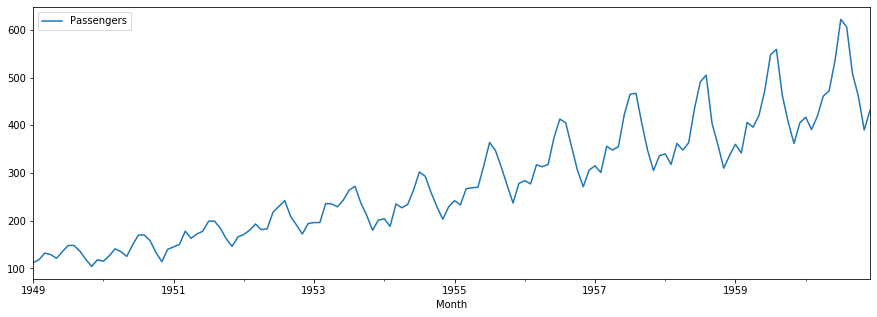

In [6]:
data.plot(figsize=(15, 5))

In [7]:
TEST_SIZE = 24

In [8]:
train, test = data.iloc[:-TEST_SIZE], data.iloc[-TEST_SIZE:]

In [9]:
x_train = np.array(range(train.shape[0]))
x_test = np.array(range(train.shape[0], data.shape[0]))

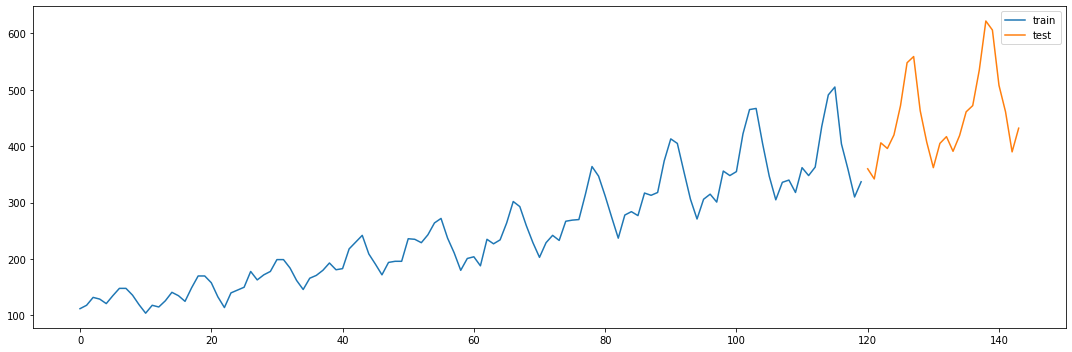

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train, label='train')
ax.plot(x_test, test, label='test')
plt.legend()
plt.tight_layout()

In [11]:
train.shape

(120, 1)

In [12]:
test.shape

(24, 1)

In [13]:
y_pred_mean = [train.values[-12:].mean()] * 24

In [14]:
y_pred_mean

[381.0,
 381.0,
 381.0,
 381.0,
 381.0,
 381.0,
 381.0,
 381.0,
 381.0,
 381.0,
 381.0,
 381.0,
 381.0,
 381.0,
 381.0,
 381.0,
 381.0,
 381.0,
 381.0,
 381.0,
 381.0,
 381.0,
 381.0,
 381.0]

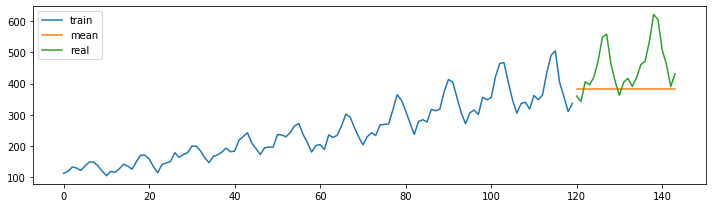

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(x_train, train, label='train')
ax.plot(x_test, y_pred_mean, label='mean')
ax.plot(x_test, test, label='real')
plt.legend()
plt.tight_layout()

In [16]:
x_train.shape, train.shape

((120,), (120, 1))

In [17]:
np.corrcoef(x_train, train.squeeze())

array([[1.       , 0.9140907],
       [0.9140907, 1.       ]])

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr_model = LinearRegression()
lr_model.fit(x_train.reshape(-1, 1), train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
y_pred_lr = lr_model.predict(x_test.reshape(-1, 1))

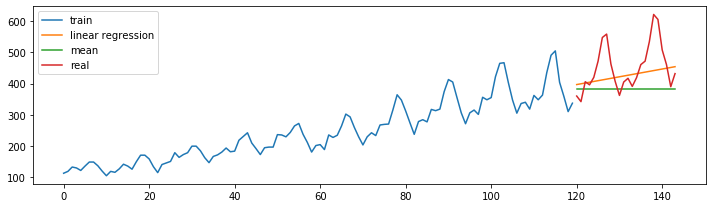

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(x_train, train, label='train')
ax.plot(x_test, y_pred_lr, label='linear regression')
ax.plot(x_test, y_pred_mean, label='mean')
ax.plot(x_test, test, label='real')
plt.legend()
plt.tight_layout()

In [22]:
def mae(y_true, y_pred):
    return np.abs(y_true - y_pred).sum() / y_true.size

In [23]:
print('MAE in mean model:', mae(test.values, y_pred_mean))

MAE in mean model: 1868.0


In [24]:
print('MAE in linear regression model:', mae(test.values, y_pred_lr))

MAE in linear regression model: 54.93759857937666


In [25]:
def mse(y_true, y_pred):
    return ((y_true - y_pred) ** 2).sum() / y_true.size

In [26]:
print('MSE in mean model:', mse(test.values, y_pred_mean))
print('MSE in linear regression model:', mse(test.values, y_pred_lr))

MSE in mean model: 255678.0
MSE in linear regression model: 5593.208874769766


In [27]:
def rmse(y_true, y_pred):
    return np.sqrt(((y_true - y_pred) ** 2).sum() / y_true.size)

In [28]:
print('RMSE in mean model:', rmse(test.values, y_pred_mean))
print('RMSE in linear regression model:', rmse(test.values, y_pred_lr))

RMSE in mean model: 505.6461213141064
RMSE in linear regression model: 74.787758856445


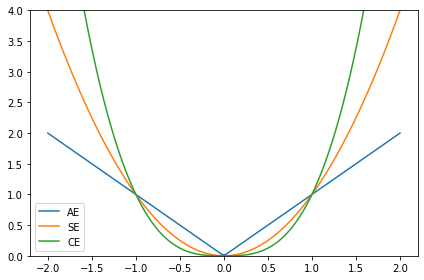

In [29]:
x_example = np.linspace(-2, 2, 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x_example, np.abs(x_example), label='AE')
ax.plot(x_example, x_example ** 2, label='SE')
ax.plot(x_example, np.abs(x_example) ** 3, label='CE')
ax.set_ylim(0, 4)
plt.legend()
plt.tight_layout()

In [30]:
def mape(y_true, y_pred):
    return 100 * np.abs((y_true - y_pred) / y_true).sum() / y_true.size

In [31]:
print('MAPE in mean model: ', mape(test.values, y_pred_mean))
print('MAPE in linear regression model: ', mape(test.values, y_pred_lr))

MAPE in mean model:  371.357752731139
MAPE in linear regression model:  11.21507247006756


In [32]:
def mpe(y_true, y_pred):
    return 100 * ((y_true - y_pred) / y_true).sum() / y_true.size

In [33]:
print('MPE in mean model: ', mpe(test.values, y_pred_mean))
print('MPE in linear regression model: ', mpe(test.values, y_pred_lr))

MPE in mean model:  326.38683095155193
MPE in linear regression model:  3.7499460317308357


In [34]:
lrw_model = LinearRegression()
lrw_model.fit(x_train.reshape(-1, 1), train,
              sample_weight=[i ** 3 for i in x_train])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
y_pred_lr_w = lrw_model.predict(x_test.reshape(-1, 1))

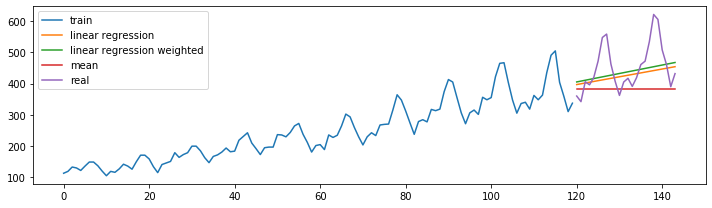

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(x_train, train, label='train')
ax.plot(x_test, y_pred_lr, label='linear regression')
ax.plot(x_test, y_pred_lr_w, label='linear regression weighted')
ax.plot(x_test, y_pred_mean, label='mean')
ax.plot(x_test, test, label='real')
plt.legend()
plt.tight_layout()

In [37]:
print('MAE in mean model: ', mae(test.values, y_pred_mean))
print('MAE in linear regression model: ', mae(test.values, y_pred_lr))
print('MAE in weighted linear regression model: ', mae(test.values, y_pred_lr_w))

print('RMSE in mean model: ', rmse(test.values, y_pred_mean))
print('RMSE in linear regression model: ', rmse(test.values, y_pred_lr))
print('RMSE in weighted linear regression model: ', rmse(test.values, y_pred_lr_w))

MAE in mean model:  1868.0
MAE in linear regression model:  54.93759857937666
MAE in weighted linear regression model:  54.36811333787682
RMSE in mean model:  505.6461213141064
RMSE in linear regression model:  74.787758856445
RMSE in weighted linear regression model:  71.38390038843868


In [38]:
p = np.poly1d(np.polyfit(x_train.squeeze(), train.squeeze(), 2))

In [39]:
xp = np.linspace(0, 144, 144)
y_pred_pr2 = p(xp)

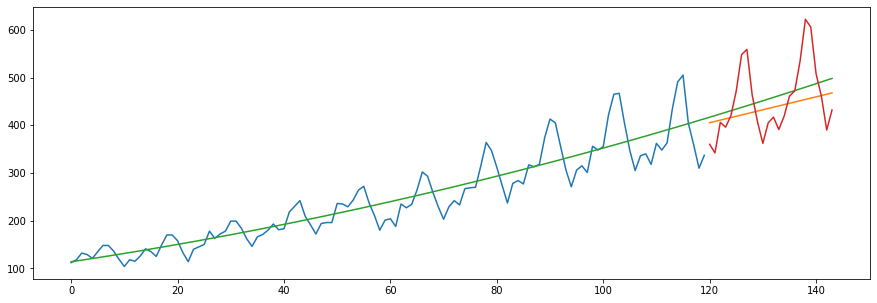

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train)
ax.plot(x_test, y_pred_lr_w, label='linear regression weighted')
ax.plot(range(144), y_pred_pr2)
ax.plot(x_test, test)

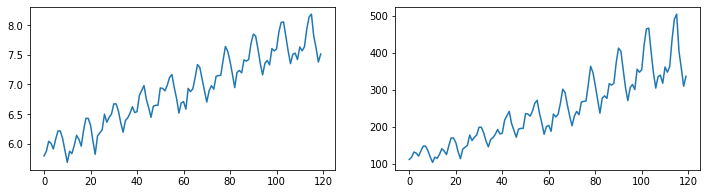

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3))
ax[0].plot(x_train, scipy.stats.boxcox(train)[0])
ax[1].plot(x_train, train)

In [42]:
train_log = np.log(train)

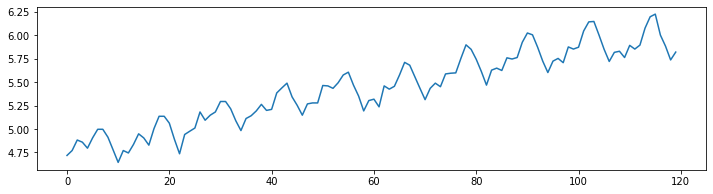

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(x_train, train_log)

In [44]:
train_log_trend = train_log.ewm(12.).mean()

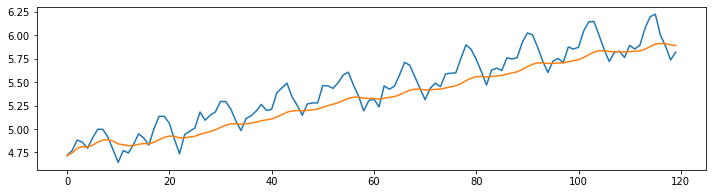

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(x_train, train_log)
ax.plot(x_train, train_log_trend)

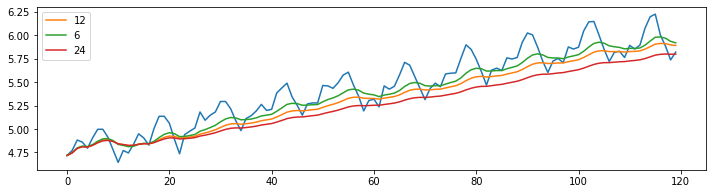

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(x_train, train_log)
ax.plot(x_train, train_log.ewm(12.).mean(), label='12')
ax.plot(x_train, train_log.ewm(6.).mean(), label='6')
ax.plot(x_train, train_log.ewm(24.).mean(), label='24')
plt.legend()

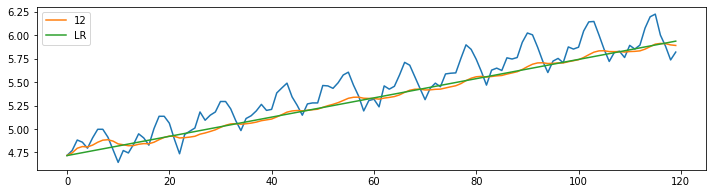

In [47]:
model = LinearRegression()
model.fit(x_train[36:].reshape(-1, 1), train_log_trend[36:])

fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(x_train, train_log)
ax.plot(x_train, train_log.ewm(12.).mean(), label='12')
ax.plot(x_train, model.predict(x_train.reshape(-1, 1)), label='LR')
plt.legend()

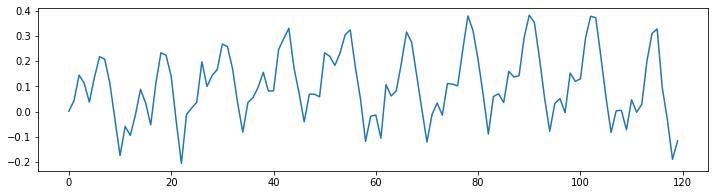

In [48]:
train_log_trend = (train_log - model.predict(x_train.reshape(-1, 1))).values.squeeze()

fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(x_train, train_log_trend)

In [49]:
train_log_trend

array([ 0.00159206,  0.04352787,  0.14539523,  0.11215578,  0.03788398,
        0.13711827,  0.21880583,  0.20855589,  0.11374857, -0.03003276,
       -0.17501529, -0.05897151, -0.09497394, -0.0138741 ,  0.08835394,
        0.03461889, -0.05259208,  0.11279055,  0.23439274,  0.2241428 ,
        0.14068946, -0.04180638, -0.206207  , -0.01101296,  0.01382842,
        0.03748003,  0.19837835,  0.10009506,  0.1435894 ,  0.16762854,
        0.26889987,  0.25864993,  0.17003093,  0.03244157, -0.08179808,
        0.03633315,  0.05575898,  0.09680233,  0.15628573,  0.08184264,
        0.08258182,  0.24734079,  0.2906751 ,  0.33128358,  0.17443017,
        0.07411941, -0.04090948,  0.06920426,  0.06921082,  0.05896088,
        0.23442809,  0.21993186,  0.18381842,  0.23290792,  0.30554564,
        0.32514866,  0.1771568 ,  0.05070486, -0.11844637, -0.01834825,
       -0.0137831 , -0.10571107,  0.10718255,  0.06229711,  0.08241827,
        0.19279632,  0.3170243 ,  0.27651995,  0.14292547,  0.00

In [50]:
train_log_trend[i:].shape, train_log_trend[:train_log_trend.size - i].shape

NameError: name 'i' is not defined

In [51]:
i = 0
np.corrcoef(train_log_trend[i:], train_log_trend[:train_log_trend.size - i])

array([[1., 1.],
       [1., 1.]])

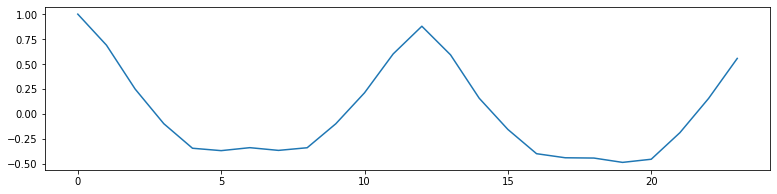

In [52]:
corr_coefficients = []
for i in range(24):
    corr_coefficients.append(
        np.corrcoef(train_log_trend[i:],
                    train_log_trend[:train_log_trend.size - i])[0,1])
    
fig, ax = plt.subplots(1, 1, figsize=(13, 3))
ax.plot(range(len(corr_coefficients)), corr_coefficients)

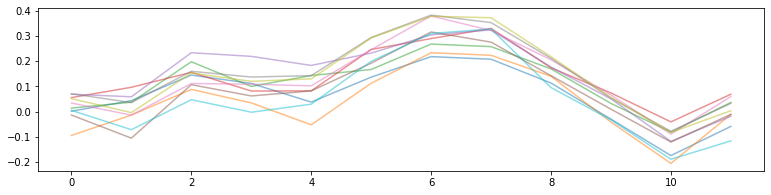

In [53]:
seasonality = np.zeros((10, 12))

fig, ax = plt.subplots(1, 1, figsize=(13, 3))
for i, j in enumerate(range(0, train_log_trend.size, 12)):
    seasonality[i,:] = train_log_trend[j:j + 12]
    ax.plot(range(12), train_log_trend[j:j + 12], alpha=.5)
    

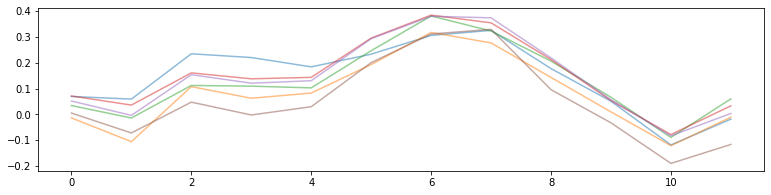

In [54]:
seasonality = np.zeros((10, 12))

fig, ax = plt.subplots(1, 1, figsize=(13, 3))
for i, j in enumerate(range(0, train_log_trend.size, 12)):
    if i > 3:
        seasonality[i,:] = train_log_trend[j:j + 12]
        ax.plot(range(12), train_log_trend[j:j + 12], alpha=.5)

In [55]:
seasonality_median = np.median(seasonality[4:,:], axis=0)

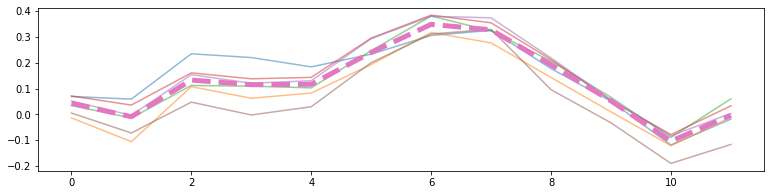

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(13, 3))
for i, j in enumerate(range(0, train_log_trend.size, 12)):
    if i > 3:
        seasonality[i,:] = train_log_trend[j:j + 12]
        ax.plot(range(12), train_log_trend[j:j + 12], alpha=.5)
ax.plot(range(12), seasonality_median, '--', lw=5)

In [57]:
seasonality_full = np.tile(seasonality_median, 10)
noise = train_log_trend - seasonality_full

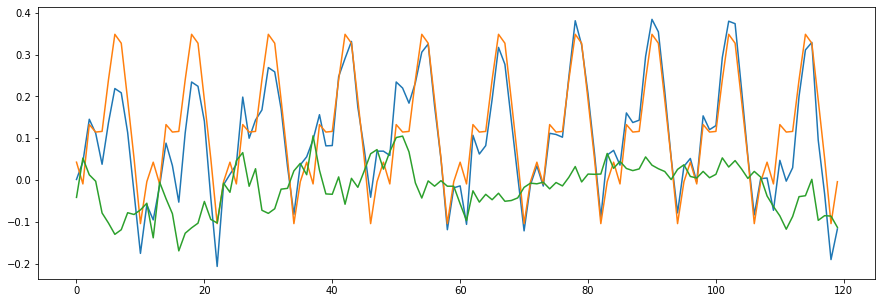

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train_log_trend)
ax.plot(x_train, seasonality_full)
ax.plot(x_train, noise)

In [64]:
noise

array([-0.04126152,  0.05260505,  0.01270702, -0.00264974, -0.07848454,
       -0.10254599, -0.12952478, -0.11847281, -0.0778805 , -0.08210222,
       -0.07112132, -0.0552368 , -0.13782752, -0.00479692, -0.04433427,
       -0.08018662, -0.1689606 , -0.12687371, -0.11393787, -0.10288591,
       -0.05093961, -0.09387584, -0.10231303, -0.00727825, -0.02902516,
        0.04655721,  0.06569013, -0.01471045,  0.02722088, -0.07203572,
       -0.07943074, -0.06837877, -0.02159814, -0.01962789,  0.02209589,
        0.04006786,  0.0129054 ,  0.10587951,  0.02359752, -0.03296288,
       -0.0337867 ,  0.00767653, -0.05765551,  0.00425487, -0.0171989 ,
        0.02204995,  0.06298449,  0.07293897,  0.02635724,  0.06803807,
        0.10173988,  0.10512635,  0.0674499 , -0.00675634, -0.04278497,
       -0.00188004, -0.01447227, -0.0013646 , -0.01455239, -0.01461353,
       -0.05663668, -0.09663389, -0.02550567, -0.0525084 , -0.03395025,
       -0.04686794, -0.03130631, -0.05050876, -0.0487036 , -0.04

In [66]:
np.random.normal(mu, sigma, size=2)

array([ 0.04787135, -0.01147094])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


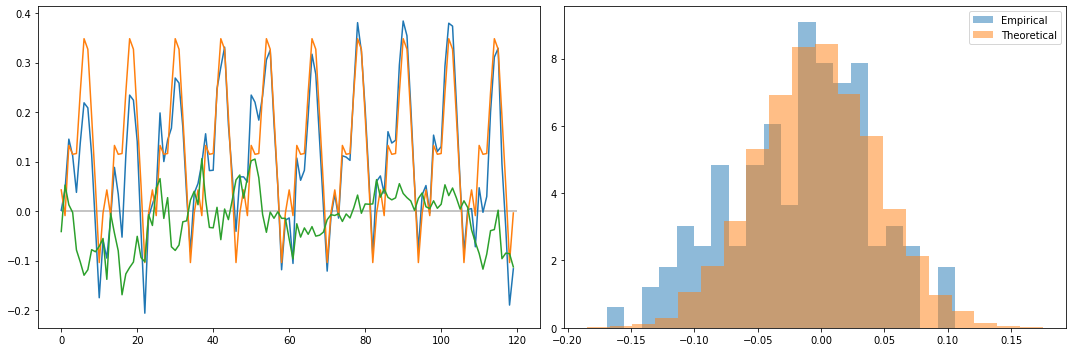

In [60]:
mu, sigma = scipy.stats.norm.fit(noise[36:])

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(x_train, train_log_trend)
ax[0].plot(x_train, seasonality_full)
ax[0].plot(x_train, noise)
ax[0].hlines(0, 0, x_train.size, 'k', alpha=.3)

ax[1].hist(noise, 20, alpha=.5, label='Empirical', normed=True)
ax[1].hist(np.random.normal(mu, sigma, size=x_train.size * 100), 20, alpha=.5, label='Theoretical', normed=True)
ax[1].legend()

plt.tight_layout()

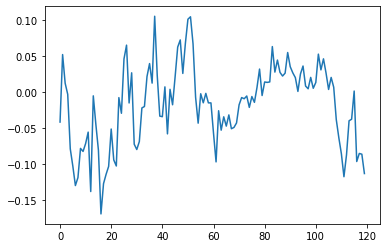

In [103]:
plt.plot(x_train, noise)

In [62]:
print(mu, sigma)

-0.0027023406571516284 0.0473771370858468


In [63]:
TEST_SIZE

24

## Prediction
### Generamos ruido

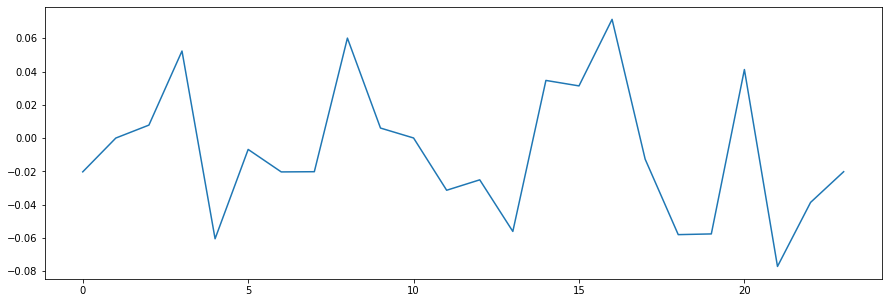

In [68]:
new_noise = np.random.normal(mu, sigma, size = TEST_SIZE)

fig, ax = plt.subplots(1, 1, figsize=(15,5))
ax.plot(range(TEST_SIZE), new_noise)

### Añadimos estacionalidad

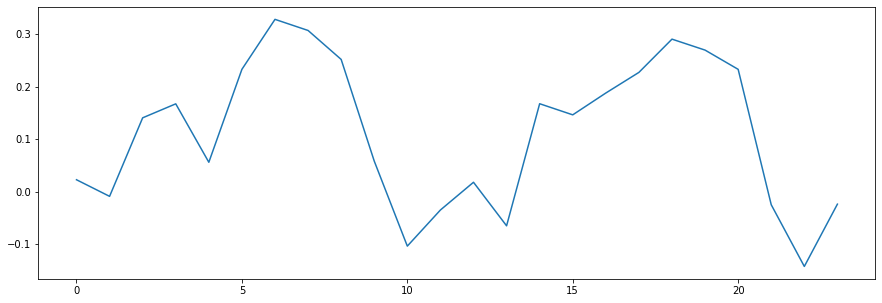

In [71]:
noise_season = new_noise + np.tile(seasonality_median, 2)

fig, ax = plt.subplots(1, 1, figsize=(15,5))
ax.plot(range(TEST_SIZE), noise_season)

### Añadimos tendencia

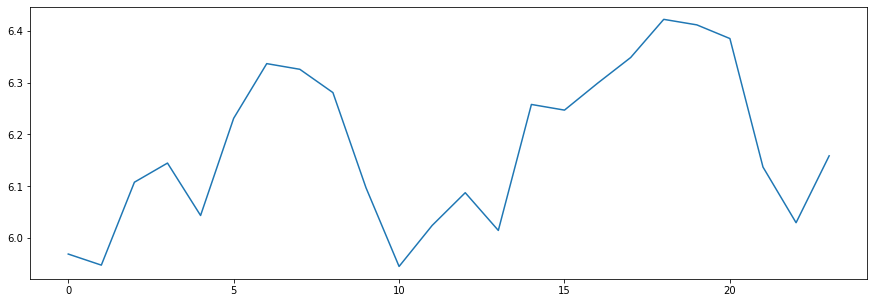

In [79]:
noise_season_trend = noise_season + model.predict(x_test.reshape(-1,1)).squeeze()

fig, ax = plt.subplots(1, 1, figsize=(15,5))
ax.plot(range(TEST_SIZE), noise_season_trend)

### Añadimos heterocedasticidad

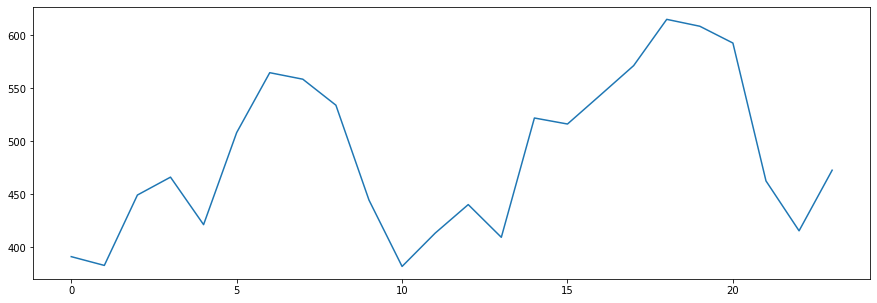

In [80]:
prediction = np.exp(noise_season_trend)

fig, ax = plt.subplots(1, 1, figsize=(15,5))
ax.plot(range(TEST_SIZE), prediction)

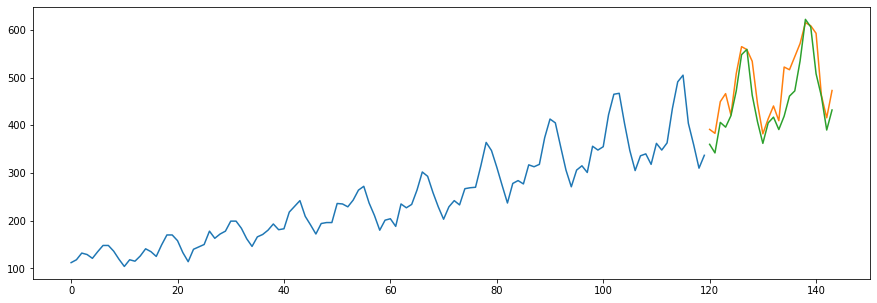

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
ax.plot(x_train, train)
ax.plot(x_test, prediction)
ax.plot(x_test, test)

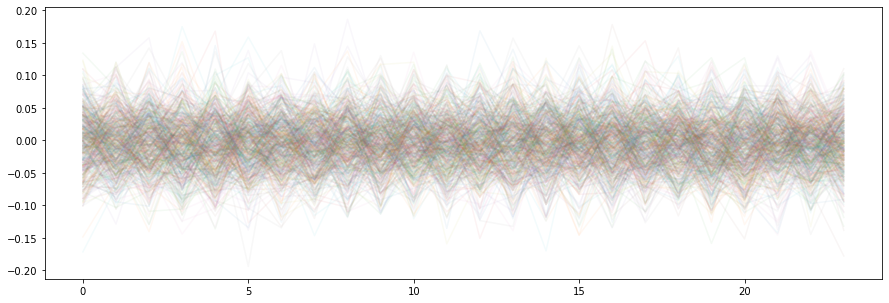

In [89]:
N_SAMPLES = 500

new_noise = np.random.normal(mu, sigma, size=(N_SAMPLES, TEST_SIZE))

fig, ax = plt.subplots(1,1, figsize=(15,5))
for i in range(N_SAMPLES):
    ax.plot(range(TEST_SIZE), new_noise[i,:], alpha=0.05)

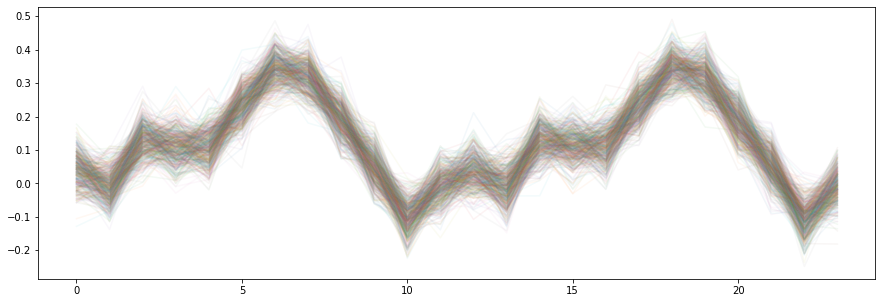

In [90]:
noise_season = new_noise + np.tile(np.tile(seasonality_median, 2), N_SAMPLES).reshape(N_SAMPLES, TEST_SIZE)

fig, ax = plt.subplots(1,1, figsize=(15,5))
for i in range(N_SAMPLES):
    ax.plot(range(TEST_SIZE), noise_season[i,:], alpha=0.05)


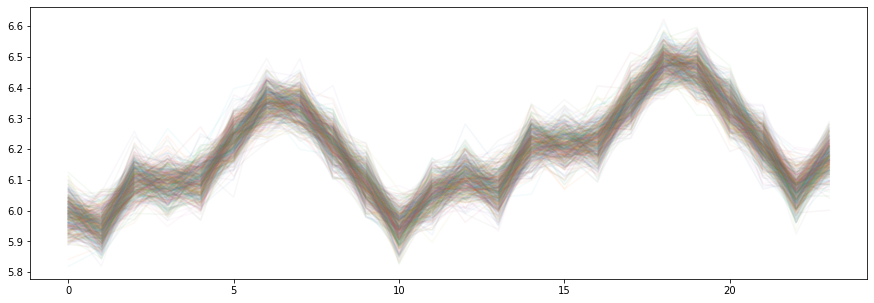

In [91]:
noise_season_trend = noise_season + \
np.tile(model.predict(x_test.reshape(-1,1)).squeeze(), N_SAMPLES).reshape(N_SAMPLES, TEST_SIZE)

fig, ax = plt.subplots(1,1, figsize=(15,5))
for i in range(N_SAMPLES):
    ax.plot(range(TEST_SIZE), noise_season_trend[i,:], alpha=0.05)                                            
                                            

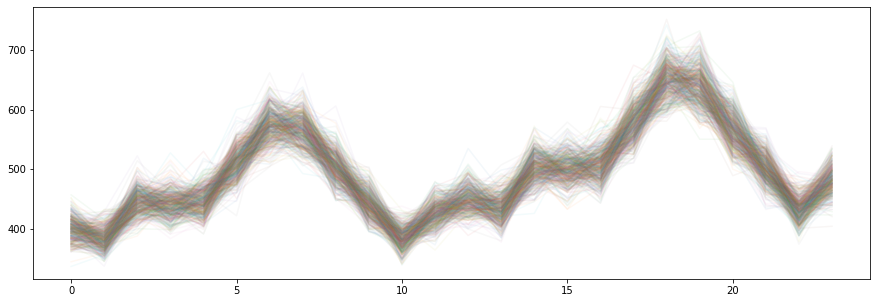

In [92]:
prediction = np.exp(noise_season_trend)

fig, ax = plt.subplots(1,1, figsize=(15,5))
for i in range(N_SAMPLES):
    ax.plot(range(TEST_SIZE), prediction[i,:], alpha=0.05)

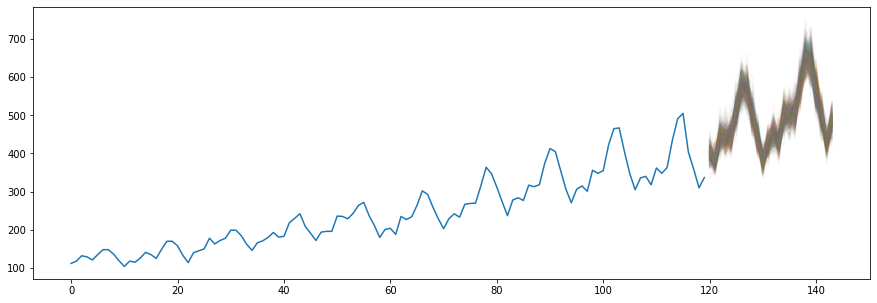

In [95]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(x_train, train)
for i in range(N_SAMPLES):
    ax.plot(x_test, prediction[i,:], alpha=0.05)

In [98]:
pred_median = np.median(prediction, axis=0)
upper_bound = np.max(prediction, axis=0)
lower_bound = np.min(prediction, axis=0)

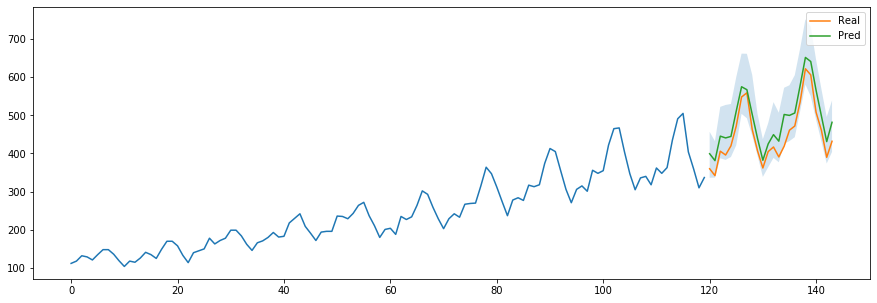

In [101]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(x_train, train)
ax.plot(x_test, test, label='Real')
ax.plot(x_test, pred_median, label='Pred')
ax.fill_between(x_test, upper_bound, lower_bound, alpha = 0.2)
ax.legend()

In [102]:
from statsmodels.tsa.seasonal import seasonal_decompose
dec = seasonal_decompose(train, model='additive')